## Case Study 1: Sales Analysis
Problem Statement:
You have a dataset containing sales data with information like product ID, sales quantity, and revenue. Perform the following tasks:

Load the dataset and inspect its structure.
Clean the data (handle missing values, duplicates, etc.).
Calculate total revenue and quantity sold for each product.
Find the top-selling products.
Analyze monthly sales trends.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\sales_data (2).csv")

In [92]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Id,Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,11,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,11,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,3,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,3,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,5,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [52]:
df = df.dropna()

In [53]:
df = df.drop_duplicates()

In [54]:
df.rename(columns={'Product': 'Product_Id', 'Order_Quantity': 'Quantity'}, inplace=True)


In [55]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Id,Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [56]:
Total_Revenue = df.groupby('Product_Id').agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()

In [57]:
Total_Revenue

,Product_Id,Quantity,Revenue
0,AWC Logo Cap,67316,549220
1,All-Purpose Bike Stand,2391,341419
2,Bike Wash - Dissolver,27579,198745
3,"Classic Vest, L",4651,268943
4,"Classic Vest, M",4876,278764
...,...,...,...
125,"Touring-3000 Yellow, 62",83,56634
126,Water Bottle - 30 oz.,162051,736841
127,"Women's Mountain Shorts, L",7620,484179
128,"Women's Mountain Shorts, M",10317,663155


In [59]:
Top_selling_products = Total_Revenue.iloc[:5]

In [46]:
Top_selling_products

,Product_Id,Quantity,Revenue
0,AWC Logo Cap,67316,549220
1,All-Purpose Bike Stand,2391,341419
2,Bike Wash - Dissolver,27579,198745
3,"Classic Vest, L",4651,268943
4,"Classic Vest, M",4876,278764


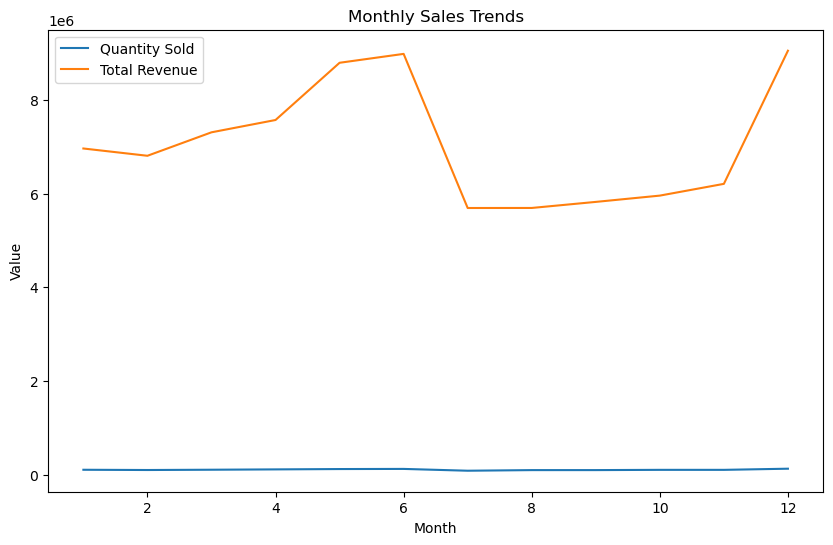

In [91]:
monthly_sales = df.groupby('Month').agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()

# Plot monthly sales trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Quantity', data=monthly_sales, label='Quantity Sold')
sns.lineplot(x='Month', y='Revenue', data=monthly_sales, label='Total Revenue')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Value')
plt.show()